In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime, date, time

In [2]:
metric_file_name = 'metric_train_by_none.log'

In [3]:
df = pd.read_csv(metric_file_name, sep=',', header=0)

In [4]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,18:16:32,18:16:3,218.06800,217.600000,1,0.2,12.2,84.2,13.9,...,0.0,5.9,5.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,18:16:46,18:16:4,964.75840,563.862000,1,1.0,30.2,68.2,31.6,...,0.0,12.1,10.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.116,18:16:53,18:16:5,1783.97940,666.384069,2,2.9,65.4,29.5,69.6,...,0.0,25.5,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.46,18:17:02,18:17:0,498.33420,240.827608,3,9.7,82.9,11.9,86.3,...,0.0,32.4,29.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.46,18:17:12,18:17:1,437.55225,236.117926,3,14.8,96.7,1.1,98.9,...,0.0,38.9,34.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df['worker_give_metrics'].unique()

array(['192.168.0.170', '192.168.0.116', '192.168.0.46', '192.168.0.219',
       '192.168.0.233', '192.168.0.230', '192.168.0.243'], dtype=object)

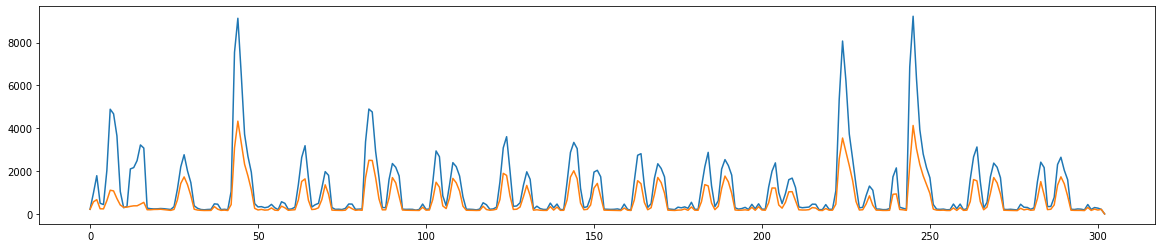

In [5]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.show()

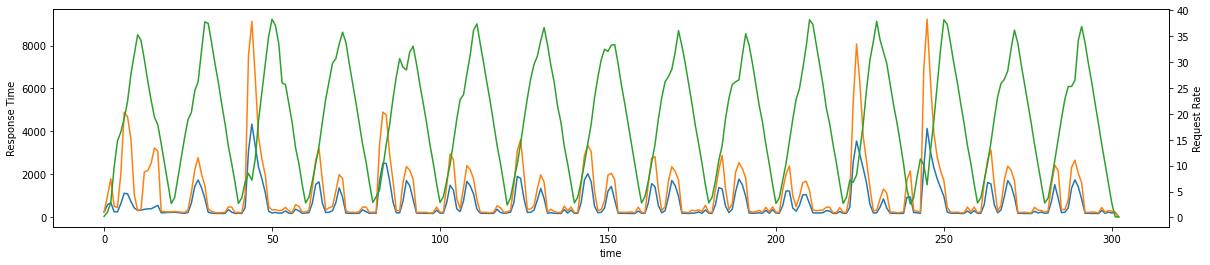

In [6]:

fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

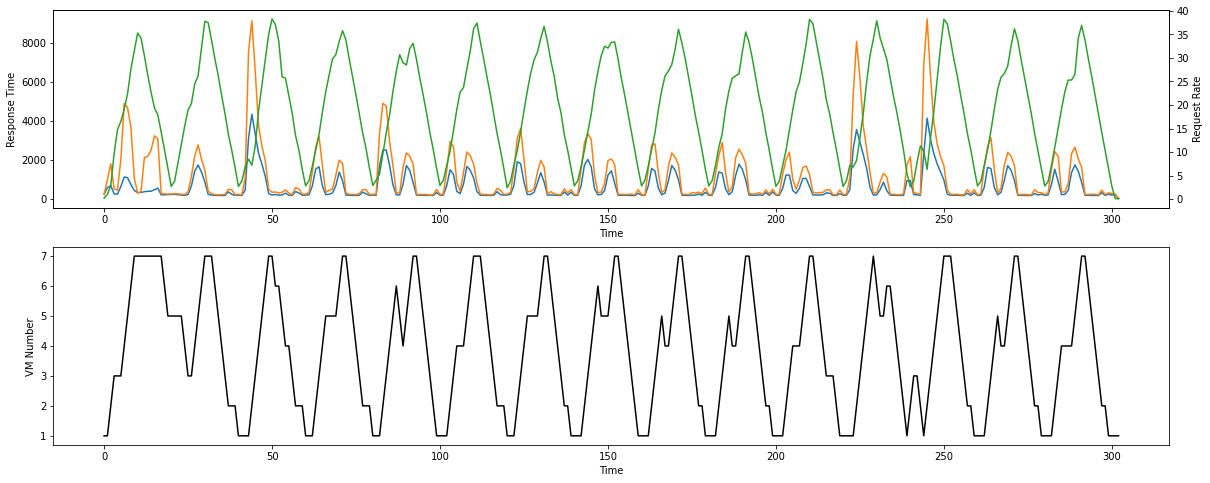

In [7]:

fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

ax1.plot(df['response_time'], color = 'C0')
ax1.plot(df['response_time_p95'], color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], color = 'C2')

ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

ax3.plot(df['worker_number'], color = 'black')
ax3.set_xlabel('Time')
ax3.set_ylabel('VM Number')

plt.show()

In [10]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,303.000000,303.000000,303.000000,303.000000
mean,1191.627226,630.471229,3.838284,19.212871
std,1501.995457,717.209203,2.019012,10.696419
min,0.566000,0.566000,1.000000,0.100000
25%,226.085900,175.574819,2.000000,10.350000
50%,445.481200,260.401037,4.000000,18.900000
75%,1771.899350,856.449020,5.000000,28.550000
max,9225.897700,4330.381972,7.000000,38.300000


In [11]:
df.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs'],
      dtype='object')

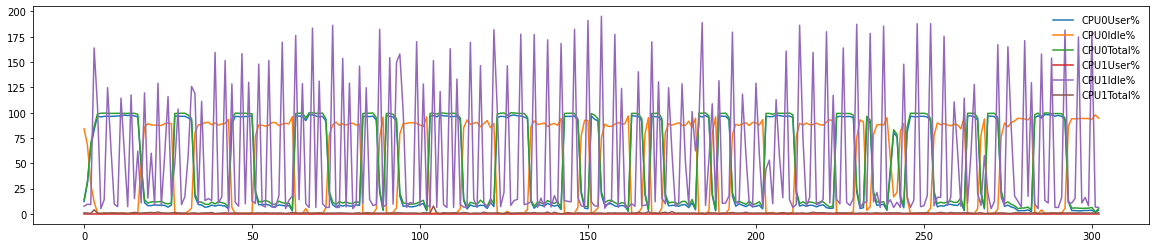

In [12]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'CPU' in col_name:
        plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [13]:
df.iloc[:, 7:13].describe()

,CPU0User%,CPU0Idle%,CPU0Total%,CPU1User%,CPU1Idle%,CPU1Total%
count,303.000000,303.000000,303.000000,303.0,303.000000,303.000000
mean,47.774917,49.442574,50.413201,0.0,56.336964,0.934983
std,43.128028,43.111824,43.221215,0.0,64.801925,0.511617
min,1.500000,0.000000,2.100000,0.0,2.400000,0.200000
25%,7.950000,0.700000,10.700000,0.0,8.800000,0.800000
50%,18.400000,79.100000,20.800000,0.0,14.000000,0.900000
75%,96.300000,89.100000,99.300000,0.0,119.350000,1.000000
max,98.200000,97.800000,100.000000,0.0,195.300000,7.800000


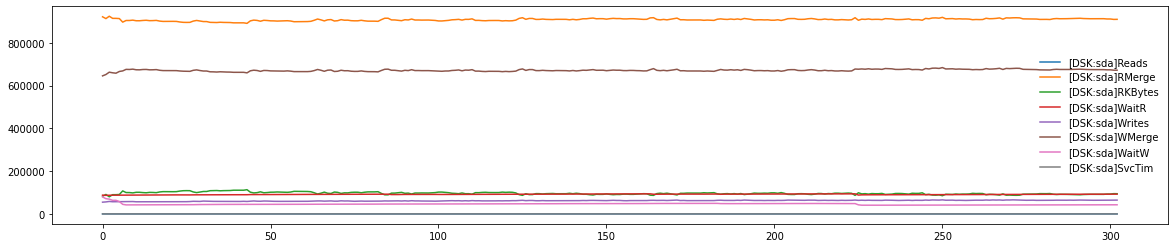

In [14]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'DSK' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

In [15]:
df.iloc[:, 13:26].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.0,303.000000,303.0,303.0,303.0,303.000000,303.0
mean,0.576898,908380.986139,96331.013861,91425.927393,61801.792739,671640.784158,0.0,45776.322112,100.0,0.0,0.0,18.715512,0.0
std,1.214807,5499.268633,5499.268633,1544.675256,2345.100769,4822.947685,0.0,4268.991886,0.0,0.0,0.0,14.605730,0.0
min,0.100000,891372.400000,80026.000000,86897.600000,54944.800000,645780.400000,0.0,40671.600000,100.0,0.0,0.0,1.600000,0.0
25%,0.200000,905002.800000,92266.000000,90425.600000,60098.000000,668637.200000,0.0,42481.000000,100.0,0.0,0.0,5.300000,0.0
50%,0.300000,909138.400000,95573.600000,91602.000000,62386.000000,671265.200000,0.0,45804.400000,100.0,0.0,0.0,10.100000,0.0
75%,0.400000,912446.000000,99709.200000,92614.600000,63664.000000,675163.600000,0.0,48203.800000,100.0,0.0,0.0,34.300000,0.0
max,11.700000,924686.000000,113339.600000,93972.800000,65816.400000,684514.000000,0.0,79473.600000,100.0,0.0,0.0,41.300000,0.0


In [16]:
df.iloc[:, 26:34].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,303.0,303.0,303.0,303.0,303.000000,303.000000,303.0,303.0
mean,0.0,0.0,0.0,0.0,18.715512,17.624422,0.0,0.0
std,0.0,0.0,0.0,0.0,14.605730,13.590187,0.0,0.0
min,0.0,0.0,0.0,0.0,1.600000,1.700000,0.0,0.0
25%,0.0,0.0,0.0,0.0,5.300000,5.100000,0.0,0.0
50%,0.0,0.0,0.0,0.0,10.100000,9.900000,0.0,0.0
75%,0.0,0.0,0.0,0.0,34.300000,32.150000,0.0,0.0
max,0.0,0.0,0.0,0.0,41.300000,37.300000,0.0,0.0


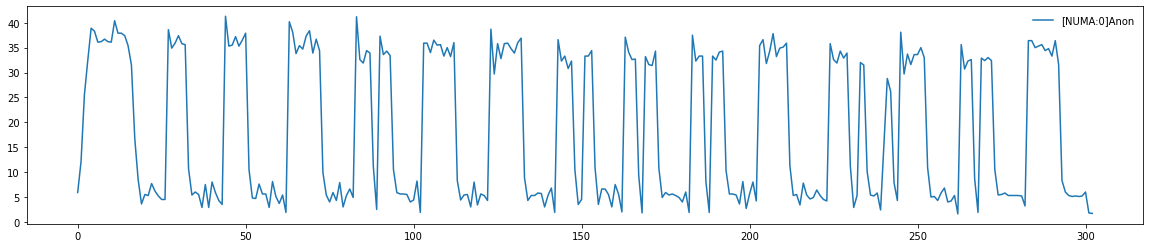

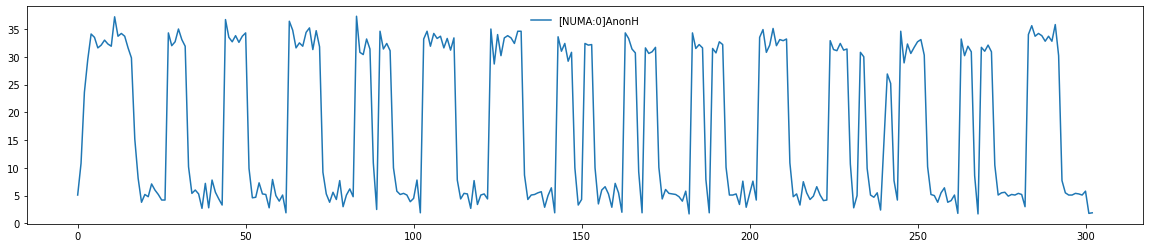

In [17]:
for col_name in df.columns:
    if 'NUMA' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.figure(figsize=(20, 4))
            plt.ticklabel_format(useOffset=False)
            plt.ticklabel_format(style='plain')
            plt.plot(df[col_name], label = col_name)
            plt.legend(frameon=False)
            plt.show()

No handles with labels found to put in legend.


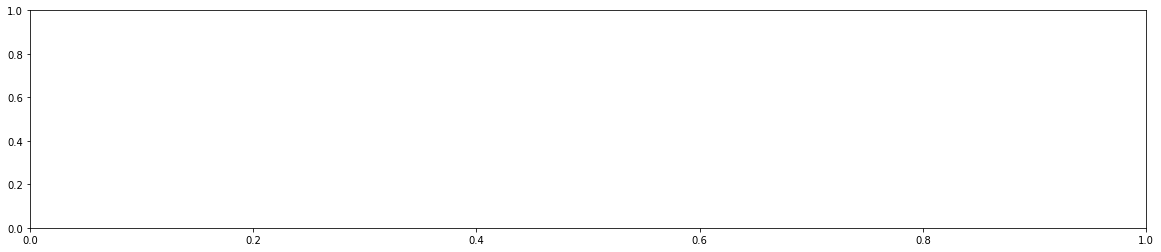

In [18]:
plt.figure(figsize=(20, 4))

for col_name in df.columns:
    if 'TCP' in col_name:
        if df[col_name].describe()[2] > 0:
            plt.plot(df[col_name], label = col_name)

plt.legend(frameon=False)
plt.show()

## CPU Threshod és Response Time Threshold

Két féle skálázást csináltam azonos terheléssel.

A két féle skálázásból származó log filokat beolvasom és összehasonlítom.

In [19]:
train_log_file_name  = 'scaled_train_by_none.log'

In [20]:
cf = pd.read_csv(train_log_file_name, sep=',', header=0)

In [21]:
print(cf.count()[0])

194


In [22]:
cf['otime'] = cf['time']

cf['time'] = cf['otime'].str[:-1]

In [27]:
cf.head()

,time,notification,actual_vm_number_was,actual_vm_number_is,otime
0,18:16:4,Worker 192.168.0.116 added.,1,2,18:16:46
1,18:16:5,Worker 192.168.0.46 added.,2,3,18:16:53
2,18:17:2,Worker 192.168.0.219 added.,3,4,18:17:23
3,18:17:3,Worker 192.168.0.233 added.,4,5,18:17:32
4,18:17:4,Worker 192.168.0.230 added.,5,6,18:17:42


In [28]:
# ezt kell összeillesztenem a másik adatbázissal a time alapján

In [29]:
df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.170,18:16:32,18:16:3,218.06800,217.600000,1,0.2,12.2,84.2,13.9,...,0.0,5.9,5.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.0.170,18:16:46,18:16:4,964.75840,563.862000,1,1.0,30.2,68.2,31.6,...,0.0,12.1,10.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.0.116,18:16:53,18:16:5,1783.97940,666.384069,2,2.9,65.4,29.5,69.6,...,0.0,25.5,23.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.0.46,18:17:02,18:17:0,498.33420,240.827608,3,9.7,82.9,11.9,86.3,...,0.0,32.4,29.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.0.46,18:17:12,18:17:1,437.55225,236.117926,3,14.8,96.7,1.1,98.9,...,0.0,38.9,34.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
mf = df.merge(cf, on='time', how='left')

In [31]:
mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime
0,192.168.0.170,18:16:32,18:16:3,218.06800,217.600000,1,0.2,12.2,84.2,13.9,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,192.168.0.170,18:16:46,18:16:4,964.75840,563.862000,1,1.0,30.2,68.2,31.6,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,18:16:46
2,192.168.0.116,18:16:53,18:16:5,1783.97940,666.384069,2,2.9,65.4,29.5,69.6,...,0.0,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.46 added.,2.0,3.0,18:16:53
3,192.168.0.46,18:17:02,18:17:0,498.33420,240.827608,3,9.7,82.9,11.9,86.3,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,192.168.0.46,18:17:12,18:17:1,437.55225,236.117926,3,14.8,96.7,1.1,98.9,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [32]:
mf['delta_vm'] = mf['actual_vm_number_is'] - mf['actual_vm_number_was']

In [33]:
mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,notification,actual_vm_number_was,actual_vm_number_is,otime,delta_vm
0,192.168.0.170,18:16:32,18:16:3,218.06800,217.600000,1,0.2,12.2,84.2,13.9,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,192.168.0.170,18:16:46,18:16:4,964.75840,563.862000,1,1.0,30.2,68.2,31.6,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.116 added.,1.0,2.0,18:16:46,1.0
2,192.168.0.116,18:16:53,18:16:5,1783.97940,666.384069,2,2.9,65.4,29.5,69.6,...,0.0,0.0,0.0,0.0,0.0,Worker 192.168.0.46 added.,2.0,3.0,18:16:53,1.0
3,192.168.0.46,18:17:02,18:17:0,498.33420,240.827608,3,9.7,82.9,11.9,86.3,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,192.168.0.46,18:17:12,18:17:1,437.55225,236.117926,3,14.8,96.7,1.1,98.9,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [34]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [35]:
mf['worker_number'].isnull().values.any()

False

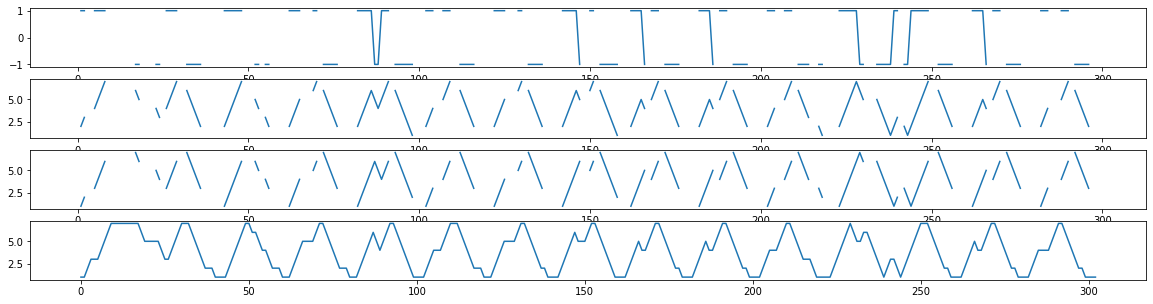

In [36]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5))

ax1.plot(mf['delta_vm'])
ax2.plot(mf['actual_vm_number_is'])
ax3.plot(mf['actual_vm_number_was'])
ax4.plot(mf['worker_number'])

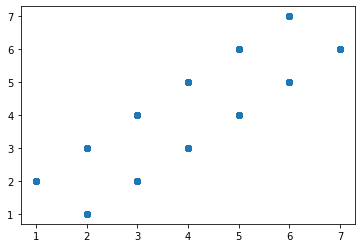

In [37]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

plt.scatter(mf['worker_number'], mf['actual_vm_number_is'])

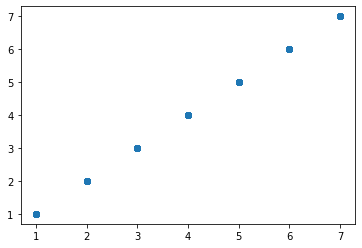

In [38]:
plt.scatter(mf['worker_number'], mf['actual_vm_number_was'])

In [39]:
# Ezt jó hogy megcsináltam (lásd a fenti ábrát)

# A 'actual_vm_number_was' == 'worker_number'

In [40]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

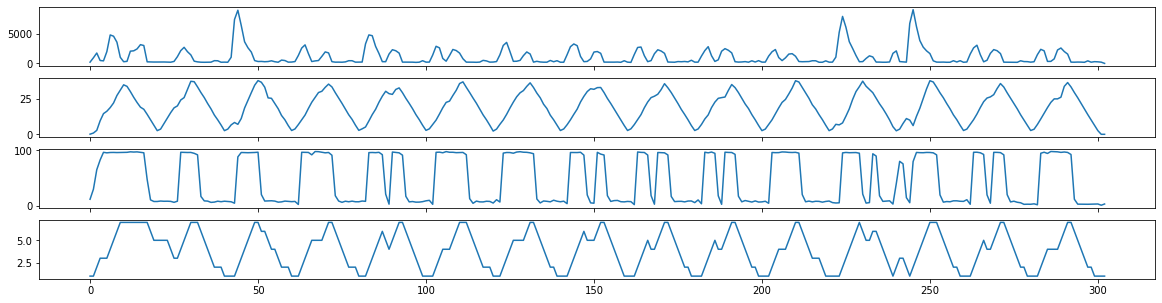

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'])
ax2.plot(mf['request_rate'])
ax3.plot(mf['CPU0User%'])
ax4.plot(mf['worker_number'])

In [42]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

In [43]:
ff = mf[['time', 'otime', 'response_time', 'worker_number', 'request_rate', 'CPU0User%', 'actual_vm_number_was', 'actual_vm_number_is', 'delta_vm']].copy()

In [44]:
ff.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm
0,18:16:3,NaN,217.600000,1,0.2,12.2,NaN,NaN,NaN
1,18:16:4,18:16:46,563.862000,1,1.0,30.2,1.0,2.0,1.0
2,18:16:5,18:16:53,666.384069,2,2.9,65.4,2.0,3.0,1.0
3,18:17:0,NaN,240.827608,3,9.7,82.9,NaN,NaN,NaN
4,18:17:1,NaN,236.117926,3,14.8,96.7,NaN,NaN,NaN


In [46]:
f2 = ff.reset_index(drop=True) # nem használom, de ha le kéne resetelni az indexet

In [ ]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [236]:
# A time a metrikához tartozik
# a otime a scalerhez
# 19:57:4 kor mérünk valamit (91.6)
# --> az is egy külön jó kérdés, hogy ez mikor kerül birásra a rendszerbe (19:57:4 (0) vagy (9))
# ----> megoldás lehet, hogy beteszek a scaler programba egy időbőjeget is, hogy mikor íra be ezt az adatot

# A sclaer 19:57:42-kor végrehajt egy skálázást

# Ennek az eredménye logikus, hogy csak a 19:57:5 metric mérésnél jelenhet meg

In [47]:
f1 = ff.copy()
f1['CPU0User%Before'] = f1['CPU0User%'].shift(-1)
f1.head()

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Before
0,18:16:3,NaN,217.600000,1,0.2,12.2,NaN,NaN,NaN,30.2
1,18:16:4,18:16:46,563.862000,1,1.0,30.2,1.0,2.0,1.0,65.4
2,18:16:5,18:16:53,666.384069,2,2.9,65.4,2.0,3.0,1.0,82.9
3,18:17:0,NaN,240.827608,3,9.7,82.9,NaN,NaN,NaN,96.7
4,18:17:1,NaN,236.117926,3,14.8,96.7,NaN,NaN,NaN,95.8


In [48]:
# viszont csak ott kell figyelmebe venni a bf-af értéket ahol ténylegesen volt skálázás

In [49]:
f2 = f1.dropna()
f2.head(10)

,time,otime,response_time,worker_number,request_rate,CPU0User%,actual_vm_number_was,actual_vm_number_is,delta_vm,CPU0User%Before
1,18:16:4,18:16:46,563.862000,1,1.0,30.2,1.0,2.0,1.0,65.4
2,18:16:5,18:16:53,666.384069,2,2.9,65.4,2.0,3.0,1.0,82.9
5,18:17:2,18:17:23,618.263376,3,16.5,95.8,3.0,4.0,1.0,96.4
6,18:17:3,18:17:32,1106.618806,4,19.1,96.4,4.0,5.0,1.0,96.5
7,18:17:4,18:17:42,1074.047134,5,22.4,96.5,5.0,6.0,1.0,96.3
8,18:17:5,18:17:52,718.032043,6,27.7,96.3,6.0,7.0,1.0,96.5
17,18:19:2,18:19:21,195.739182,7,14.3,47.8,7.0,6.0,-1.0,11.1
18,18:19:3,18:19:31,194.326942,6,10.4,11.1,6.0,5.0,-1.0,8.2
23,18:20:2,18:20:21,187.559274,5,11.7,8.7,5.0,4.0,-1.0,8.4
24,18:20:3,18:20:31,166.148684,4,15.5,8.4,4.0,3.0,-1.0,6.7


In [50]:
# cpu' = c0 + c1 * cpu * worker_number/(worker_number + delta_vm) + c2 * cpu * delta_vm/(worker_number + delta_vm)

# m'   = c0 + c1 · m · w/(w + k) + c2 · m · k/(w + k)

In [51]:
f3 = f2.copy()
f3['cpu_term1'] = f3['CPU0User%Before'] * f3['worker_number']/(f3['worker_number'] + f3['delta_vm'])
f3['cpu_term2'] = f3['CPU0User%Before'] * f3['delta_vm']/(f3['worker_number'] + f3['delta_vm'])

In [52]:
from sklearn.linear_model import LinearRegression

_cpu_x = f3[['cpu_term1', 'cpu_term2']]

_cpu_y = f3['CPU0User%']

_cpu_x.shape

_cpu_y.shape

lr = LinearRegression(fit_intercept=True)

rr = lr.fit(_cpu_x, _cpu_y)

rr.score(_cpu_x, _cpu_y)

0.5588437279659263

In [53]:
rr.coef_

array([ 1.35924711, -1.02870665])

In [54]:
rr.intercept_

5.5416589932676885

In [55]:
pred_cpu = rr.predict(_cpu_x)

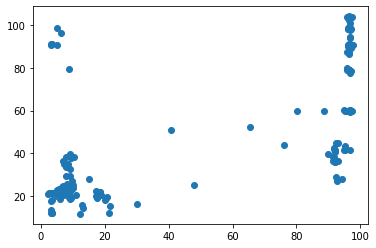

In [56]:
plt.scatter(f3['CPU0User%'], pred_cpu)

In [57]:
# Állati jó kérdés, hogy a becslés miért 'ennyire szar' amikor az eredeti cikkben azt mondták, hogy viszonlag
# csekély hibával volt képes becsülni a lineáris regresszió a before after állapotot

# Megoldás:

# 1.

# Lehet, hogy ez az eredmény amúgy nem is annyira rossz.

# 2.

# Lehet, hogy mérés rögzítésénél valamit elbaszok

# 3.

# Lehet, hogy nem VM-től kéne lekérnem a metrikákat, hanem tényleg az összestől és azt a statisztikát rakni be

# x.

# Ezek lineáris kombinációja

In [58]:
import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-04-29 19:28:35
19:28:35


In [59]:
from sklearn.linear_model import LinearRegression
    
def create_model_for_metric(columnname: str):
    
    f1 = mf.copy()
    __before_name = columnname + 'Before'
    f1[__before_name] = f1[columnname].shift(-1)
    
    f1 = f1.dropna()
    
    __metric_term1 = columnname + '_term1'
    __metric_term2 = columnname + '_term2'
    f1[__metric_term1] = f1[__before_name] * f1['worker_number']/(f1['worker_number'] + f1['delta_vm'])
    f1[__metric_term2] = f1[__before_name] * f1['delta_vm']/(f1['worker_number'] + f1['delta_vm'])
    
    __metric_X = f1[[__metric_term1, __metric_term2]]
    __metric_y = f1[columnname]

    lr = LinearRegression(fit_intercept=True)

    rr = lr.fit(__metric_X, __metric_y)

    __fit_score = rr.score(__metric_X, __metric_y)
    
    __fit_coef_ = rr.coef_
    
    __fit_intercept_ = rr.intercept_
    
    __pred_metric = rr.predict(__metric_X)
    
    plt.scatter(f1[columnname], __pred_metric)

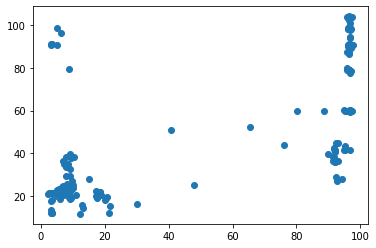

In [60]:
create_model_for_metric('CPU0User%')

In [61]:
mf.columns

Index(['worker_give_metrics', 'write_to_csv_time', 'time', 'response_time_p95',
       'response_time', 'worker_number', 'request_rate', 'CPU0User%',
       'CPU0Idle%', 'CPU0Total%', 'CPU1User%', 'CPU1Idle%', 'CPU1Total%',
       '[DSK:sda]Reads', '[DSK:sda]RMerge', '[DSK:sda]RKBytes',
       '[DSK:sda]WaitR', '[DSK:sda]Writes', '[DSK:sda]WMerge',
       ' [DSK:sda]WKBytes', '[DSK:sda]WaitW', '[DSK:sda]Request',
       '[DSK:sda]QueLen', '[DSK:sda]Wait', '[DSK:sda]SvcTim', '[DSK:sda]Util',
       '[NUMA:0]Used', '[NUMA:0]Free', '[NUMA:0]Slab', '[NUMA:0]Mapped',
       '[NUMA:0]Anon', '[NUMA:0]AnonH', '[NUMA:0]Inactive', ' [NUMA:0]Hits',
       '[TCPD]InReceives', '[TCPD]InDelivers', '[TCPD]OutRequests',
       '[TCPD]InSegs', '[TCPD]OutSegs', 'notification', 'actual_vm_number_was',
       'actual_vm_number_is', 'otime', 'delta_vm'],
      dtype='object')

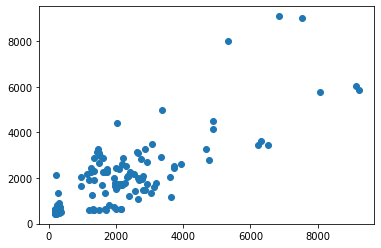

In [62]:
create_model_for_metric('response_time_p95')

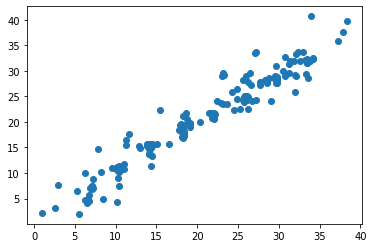

In [63]:
create_model_for_metric('request_rate')

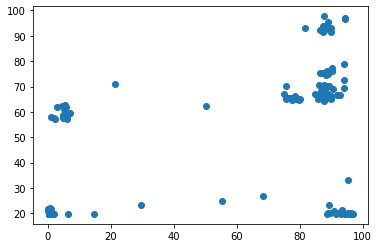

In [64]:
create_model_for_metric('CPU0Idle%')

In [65]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [66]:
cn = mf.columns

interact(create_model_for_metric, columnname=cn);

interactive(children=(Dropdown(description='columnname', options=('worker_give_metrics', 'write_to_csv_time', …